In [ ]:
import pandas as pd
import glob
import os
import warnings

# --- 1. SOPPRESSIONE DEI WARNING ---
# Ignora il warning specifico di openpyxl
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
print("I warning di openpyxl sono stati soppressi.")

# --- 1. CONFIGURAZIONE E DEFINIZIONE PERCORSI ---

# !!! IMPORTANTE: DEVI MODIFICARE QUESTI PERCORSI !!!
# Assicurati che questi puntino alle cartelle contenenti i file CSV PRE e POST.
# Esempio: path_pre_folder = './dati_pre/'
path_pre_folder = 'pre'  # Ad esempio, se i file sono nella stessa cartella del notebook
path_post_folder = 'post' # Ad esempio, se i file sono nella stessa cartella del notebook

# Colonne ID
MERGE_KEY_PRE = 'Q36'
MERGE_KEY_POST = 'Q28'
FINAL_MERGE_KEY = MERGE_KEY_PRE # useremo Q36 come nome della colonna ID finale

print("Configurazione avviata. Percorsi da verificare.")
print("-" * 50)


# --- 2. ELABORAZIONE DATI PRE: CONCATENA E ORDINA ---

print("Passaggio 2: Elaborazione dei dati PRE...")

# Trova tutti i file XLSX nella cartella PRE
all_pre_files = glob.glob(os.path.join(path_pre_folder, '*.xlsx')) 

# Lista per contenere i DataFrame
list_pre = []
for filename in all_pre_files:
    df = pd.read_excel(filename)
    list_pre.append(df)

# Concatenazione dei file PRE
df_pre_combined = pd.concat(list_pre, ignore_index=True)

# Ordinamento per ID (Q36)
df_pre_combined = df_pre_combined.sort_values(by=MERGE_KEY_PRE).reset_index(drop=True).iloc[:-2]

print(f"Concatenazione PRE completata. Righe totali: {len(df_pre_combined)}")

print(df_pre_combined[MERGE_KEY_PRE].tolist())
print("-" * 50)


# --- 3. ELABORAZIONE DATI POST: CONCATENA E ORDINA ---

print("Passaggio 3: Elaborazione dei dati POST...")

# Trova tutti i file XLSX nella cartella POST
all_post_files = glob.glob(os.path.join(path_post_folder, '*.xlsx'))

list_post = []
for filename in all_post_files:
    df = pd.read_excel(filename)
    list_post.append(df)

# Concatenazione dei file POST
df_post_combined = pd.concat(list_post, ignore_index=True)

# Rinominare l'ID del POST (Q28) per il merge
df_post_combined.rename(columns={MERGE_KEY_POST: FINAL_MERGE_KEY}, inplace=True)

# Ordinamento per ID (ora Q36)
df_post_combined = df_post_combined.sort_values(by=FINAL_MERGE_KEY).reset_index(drop=True).iloc[:-2]

print(f"Concatenazione POST completata. Righe totali: {len(df_post_combined)}")
print(df_post_combined[FINAL_MERGE_KEY].tolist())
print("-" * 50)


# --- 4. MERGE FINALE: PRE COMBINATO + POST COMBINATO ---

print("Passaggio 4: Merge finale Pre e Post...")

# Merge dei due dataset combinati.
# Utilizziamo un inner join per mantenere solo i partecipanti che hanno risposto sia al PRE che al POST.
merged_df = pd.merge(
    df_pre_combined, 
    df_post_combined, 
    on=FINAL_MERGE_KEY, 
    how='inner', 
    suffixes=('_Pre', '_Post')
)

# Ordinamento finale per ID
merged_df = merged_df.sort_values(by=FINAL_MERGE_KEY).reset_index(drop=True)

print(f"\nMERGE FINALE completato. Partecipanti appaiati: {len(merged_df)}")
print(f"Le colonne Likert del PRE ora finiscono con '_Pre' (es. Q29_1_Pre).")
print(f"Le colonne Likert del POST ora finiscono con '_Post' (es. Q12_1_Post).")

print("\nDataFrame finale (ordinate per ID):")
print(merged_df[FINAL_MERGE_KEY].tolist())

I warning di openpyxl sono stati soppressi.
Configurazione avviata. Percorsi da verificare.
--------------------------------------------------
Passaggio 2: Elaborazione dei dati PRE...
Concatenazione PRE completata. Righe totali: 34
['201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '231', '232', '233', '234', '235']
--------------------------------------------------
Passaggio 3: Elaborazione dei dati POST...
Concatenazione POST completata. Righe totali: 34
['201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '231', '232', '233', '234', '235']
--------------------------------------------------
Passaggio 4: Merge finale Pre e Post...

MERGE FINALE completato. Partecipanti appaiati: 34
Le 

In [209]:
# ==============================================================================
# 2. CARICAMENTO DEL FOGLIO EXCEL
# ==============================================================================

# ⚠️ INSERISCI QUI IL PERCORSO AL TUO FILE EXCEL
file_excel_path = "C:/Users/gabri/OneDrive/Desktop/repo_tesi/ENIB/decider/qualtrics/COCOA.xlsx"

try:
    # Carica il foglio Excel nel DataFrame
    excel_df = pd.read_excel(file_excel_path)
    
except FileNotFoundError:
    print(f"ATTENZIONE: File '{file_excel_path}' non trovato. Uso i dati di esempio.")
    
    # ⚠️ Dati di esempio per simulare il contenuto del foglio Excel
    dati_excel = {
        'ID': [1001, 1003, 1005, 9999], # ID che coincidono e uno extra (9999)
        'Personalizzato': ['SI', 'NO', 'SI', 'SI'],
        'Extra_Info': ['X', 'Y', 'Z', 'W']
    }
    excel_df = pd.DataFrame(dati_excel)

print("DataFrame dal Foglio Excel (excel_df):")
print(excel_df)
print("-" * 30)

# Assicurati che le chiavi di unione siano stringhe in entrambi i DataFrame
merged_df['Q36'] = merged_df['Q36'].astype(str)
excel_df['ID'] = excel_df['ID'].astype(str)

print("Tipo colonna Q36 (merged_df):", merged_df['Q36'].dtype)
print("Tipo colonna ID (excel_df):", excel_df['ID'].dtype)
print("-" * 30)

# ==============================================================================
# 3. ESECUZIONE DEL MERGE
# ==============================================================================

# Unione del merged_df con le colonne 'ID' e 'Personalizzato' del foglio Excel.
# 'how=left' assicura che tutte le righe del merged_df originale rimangano.
df_finale = pd.merge(
    merged_df,
    excel_df[['ID', 'Personalizzato']], # Seleziona solo ID e Personalizzato
    left_on='Q36',                      # Chiave nel tuo df originale
    right_on='ID',                      # Chiave nel foglio Excel
    how='left'                          
)

# ==============================================================================
# 4. PULIZIA (Rimozione della colonna ID duplicata)
# ==============================================================================

# Dopo il merge, la colonna 'ID' del foglio Excel è ridondante (è un duplicato di 'Q36')
# e può essere rimossa per mantenere il DataFrame pulito.
merged_df = df_finale.drop(columns=['ID'])


# ==============================================================================
# RISULTATO FINALE
# ==============================================================================
print("DataFrame Finale dopo il Merge:")
print(merged_df["Personalizzato"].tolist())

# NOTA: Dove non c'è corrispondenza di ID (es. 1002, 1004), 
# la colonna 'Personalizzato' assume il valore NaN (Not a Number, dato mancante).

DataFrame dal Foglio Excel (excel_df):
                 Nome         Cognome   ID Personalizzato  \
0           Francesco      Sorrentino  202             NO   
1             Alessia         Vastola  203             NO   
2              Carmen        Barbesco  201             NO   
3            Beatrice        Schisano  204             NO   
4             Giacomo           Zezza  205             NO   
5                Luca         Alterio  206             NO   
6              Simone        Giuliana  207             NO   
7              Adrian   Ciprian Iancu  208             NO   
8            Gabriele          Alzati  209             NO   
9            Federico           Lizzi  210             NO   
10             Matteo       Zitarelli  211             SI   
11              Elisa           Ricci  212             SI   
12              Elisa       Sacchetta  213             SI   
13             Olivia    Vecchiarelli  214             SI   
14               Luca       Rodriguez  215    

In [210]:
colonna_di_interesse = 'Q17' 

# 3. Calcola la frequenza (conteggio) di ogni valore distinto
frequenza_valori = merged_df[colonna_di_interesse].value_counts()

print(f"Distribuzione di frequenza per la colonna '{colonna_di_interesse}':")
print(frequenza_valori)

# Per ottenere anche le frequenze percentuali:
frequenza_percentuale = merged_df[colonna_di_interesse].value_counts(normalize=True) * 100
print("\nFrequenza in percentuale:")
print(frequenza_percentuale)

Distribuzione di frequenza per la colonna 'Q17':
Q17
18-24    13
25-29    11
30-34     5
40+       4
35-39     1
Name: count, dtype: int64

Frequenza in percentuale:
Q17
18-24    38.235294
25-29    32.352941
30-34    14.705882
40+      11.764706
35-39     2.941176
Name: proportion, dtype: float64


In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurazione standard per lo stile dei grafici
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Imposta una dimensione predefinita

def bar_plot(colonna_categorica):

    # Calcola le frequenze (o le percentuali se preferisci)
    # Se vuoi le percentuali, aggiungi: normalize=True
    frequenze = merged_df[colonna_categorica].value_counts().reset_index()
    frequenze.columns = [colonna_categorica, 'Conteggio']

    # Creazione del Grafico a Barre
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')

    plt.title(f'Distribuzione delle Risposte per {colonna_categorica}', fontsize=16)
    plt.xlabel('Frequenza Assoluta (N)', fontsize=12)
    plt.ylabel('Opzione di Risposta', fontsize=12)
    plt.tight_layout() # Adatta il layout per non tagliare le etichette
    plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_4492\2402683556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')


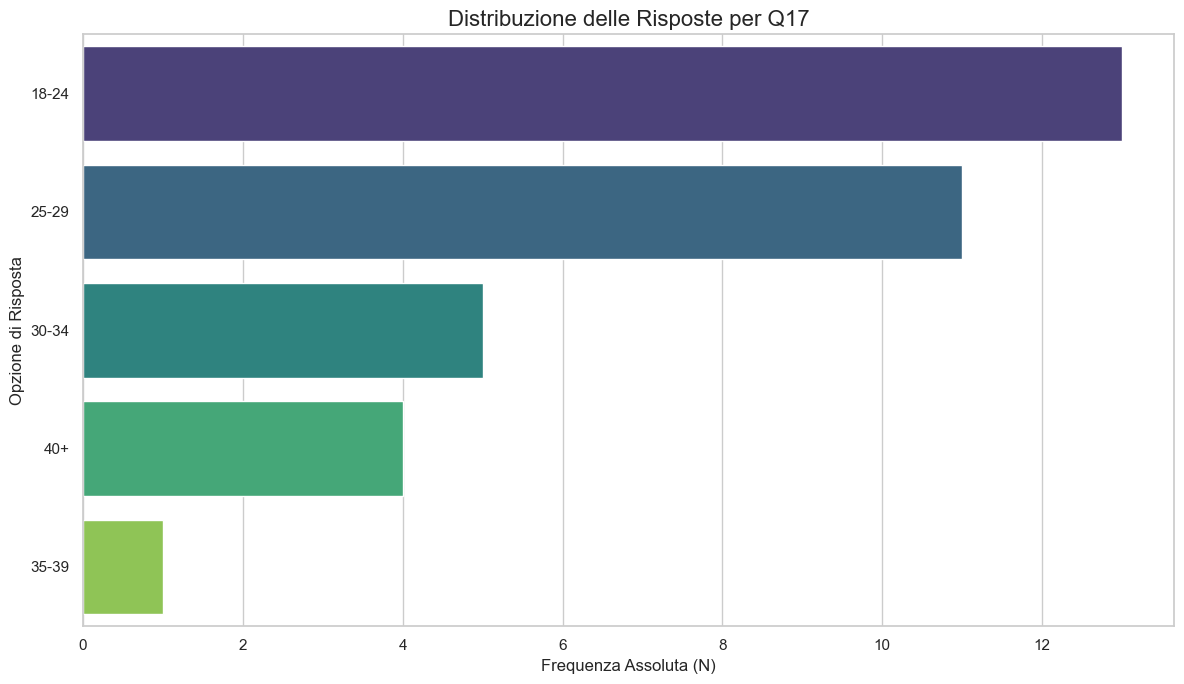

In [212]:
bar_plot("Q17")

C:\Users\gabri\AppData\Local\Temp\ipykernel_4492\2402683556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')


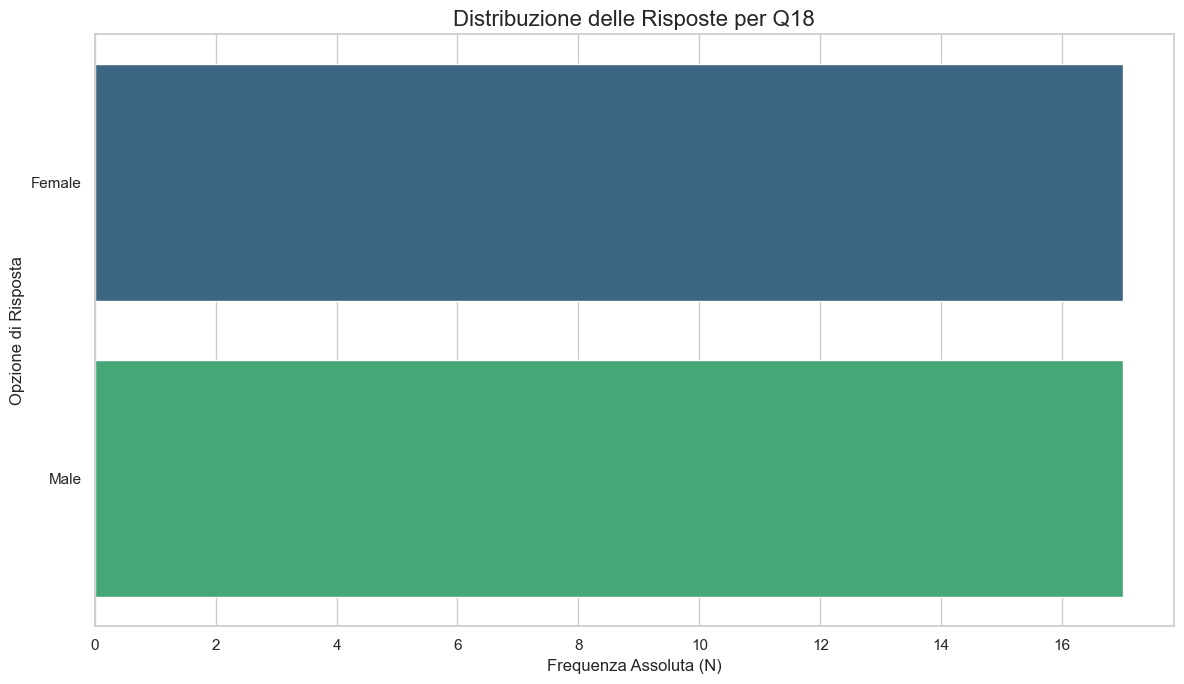

In [213]:
bar_plot("Q18")

In [214]:
merged_df["Q24"] = merged_df["Q24"].astype(str).str.strip().str.lower()

# b. Mappatura: Correzione di varianti ed errori di battitura
mapping = {
    'italia': 'italy',
    'italt': 'italy',
    # Aggiungi qui altre correzioni se necessario (es. 'romania ' -> 'romania')
}
merged_df['Q24'] = merged_df['Q24'].replace(mapping)

# c. Standardizzazione: Capitalizza per il formato finale ("Italy", "Romania")
merged_df['Q24'] = merged_df['Q24'].str.capitalize()

C:\Users\gabri\AppData\Local\Temp\ipykernel_4492\2402683556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')


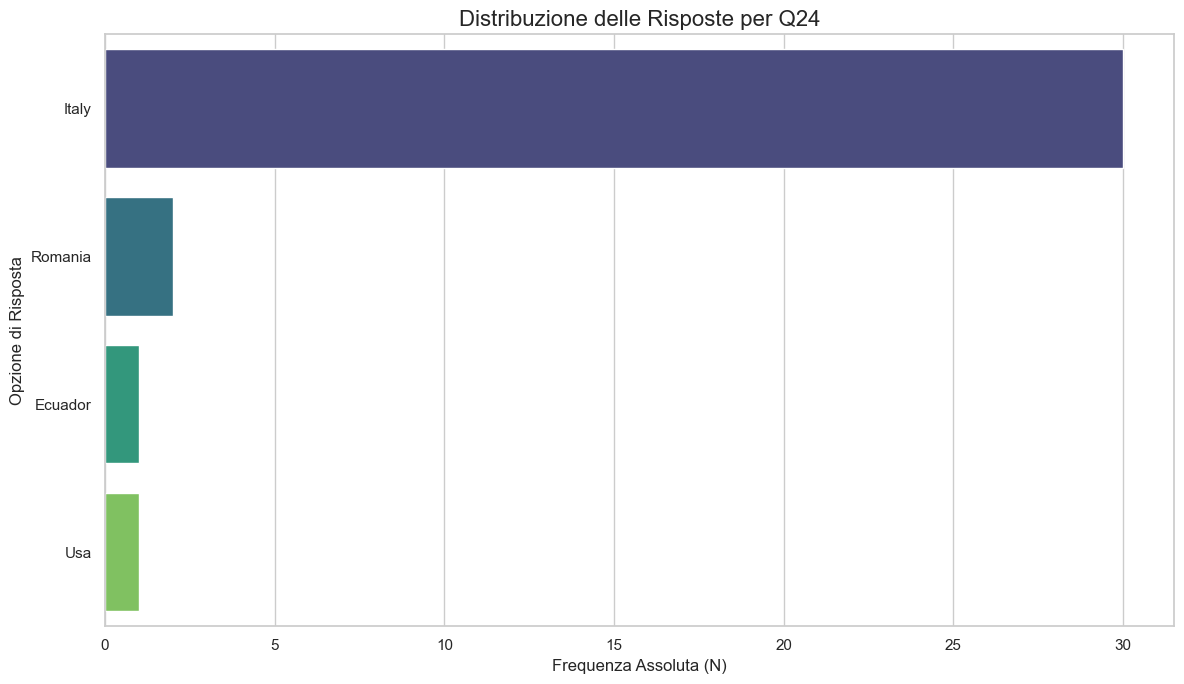

In [215]:
bar_plot("Q24")

C:\Users\gabri\AppData\Local\Temp\ipykernel_4492\2402683556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')


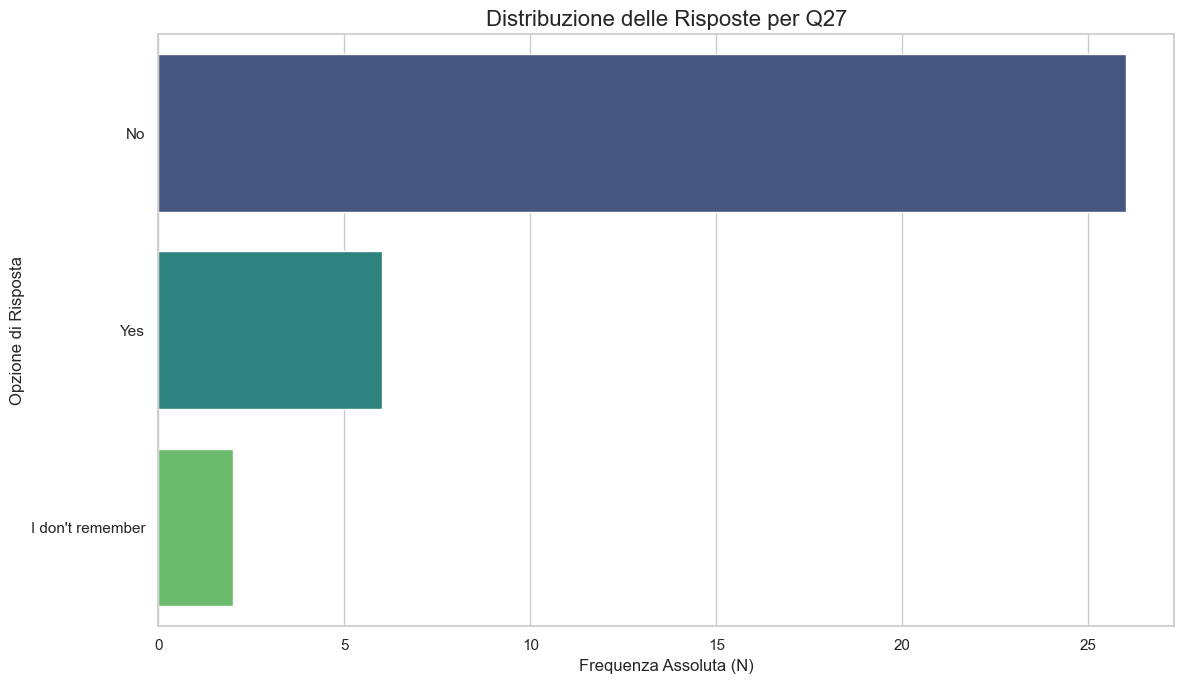

In [216]:
bar_plot("Q27")

C:\Users\gabri\AppData\Local\Temp\ipykernel_4492\2402683556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')


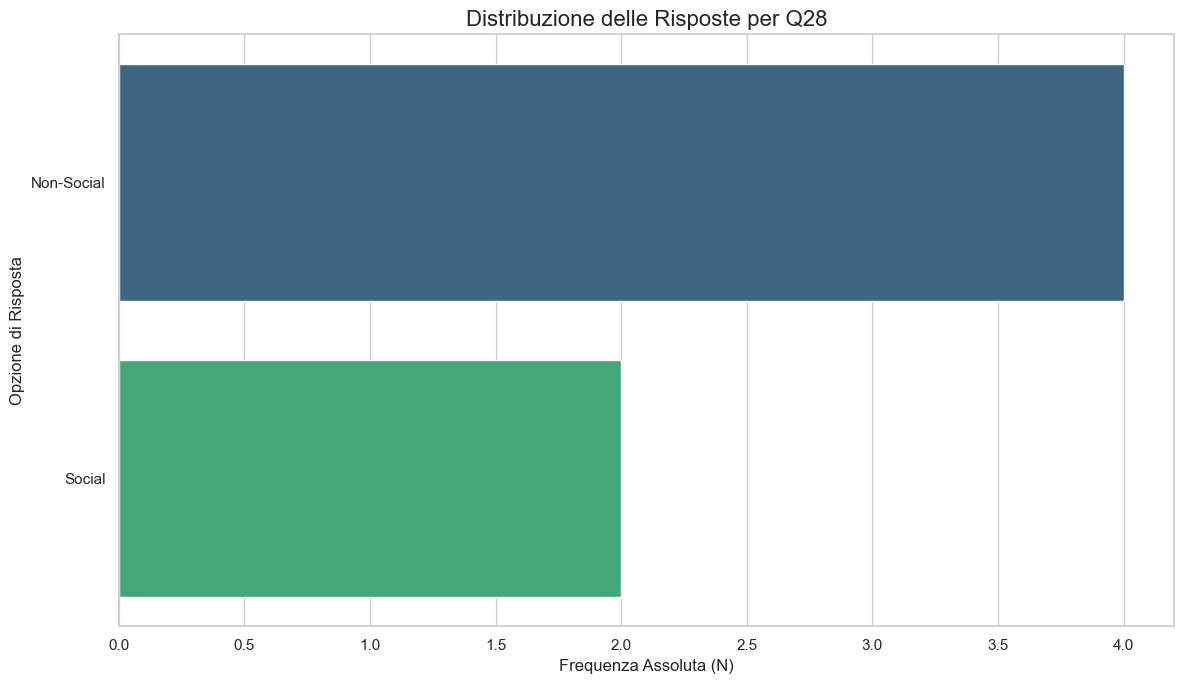

In [217]:
bar_plot("Q28")

In [218]:
import numpy as np

# === 1. Funzione per calcolare i punteggi OCEAN dai file raw ===
def calcola_OCEAN_da_raw(df):
    """
    Legge tutti i file Excel in una cartella, calcola i punteggi OCEAN (Big Five)
    a partire dalle 15 domande (Q29_1...Q29_15), e restituisce un DataFrame.
    """
    likert_scale = {
        "strongly disagree": 1,
        "disagree": 2,
        "somewhat disagree": 3,
        "neither agree nor disagree": 4,
        "somewhat agree": 5,
        "agree": 6,
        "strongly agree": 7
    }

    reverse_items = [3, 6, 10, 14]  # item da invertire (1-based)
    traits = {
        "neuroticism":        [1, 2, 3],
        "extroversion":       [4, 5, 6],
        "openness":           [7, 8, 9],
        "agreeableness":      [10, 11, 12],
        "conscientiousness":  [13, 14, 15],
    }

    ids = df["Q36"]

    # === Filtra solo le colonne delle 15 domande ===
    bfi_df = df.filter(regex="^Q29")

    # Prima riga = testo, quindi la scartiamo
    bfi_df = bfi_df.dropna(how="all").reset_index(drop=True)
    df = df.dropna(how="all").reset_index(drop=True)

    # === Mappa risposte testuali a Likert 1–7 ===
    bfi_df = bfi_df.map(lambda x: likert_scale.get(str(x).strip().lower(), None))

    # === Reverse scoring ===
    for i in reverse_items:
        col = f"Q29_{i}"
        if col in bfi_df.columns:
            bfi_df[col] = bfi_df[col].apply(lambda x: 8 - x if pd.notna(x) else x)

    # === Calcola media per ogni tratto ===
    bfi_scores = pd.DataFrame(index=bfi_df.index)
    for trait, indices in traits.items():
        cols = [f"Q29_{i}" for i in indices if f"Q29_{i}" in bfi_df.columns]
        bfi_scores[trait] = bfi_df[cols].mean(axis=1).round(1)

    final_df = pd.DataFrame(ids)
    final_df[["openness", "conscientiousness", "extroversion", "agreeableness", "neuroticism"]] = bfi_scores
        
    return final_df


In [219]:
scores = calcola_OCEAN_da_raw(merged_df)
scores

,Q36,openness,conscientiousness,extroversion,agreeableness,neuroticism
0,201,3.3,2.7,4.7,5.0,4.7
1,202,2.7,4.0,6.0,6.0,5.0
2,203,4.3,4.3,5.0,5.0,3.7
3,204,4.0,5.0,6.0,6.7,3.7
4,205,2.7,5.0,6.0,5.0,5.3
5,206,3.0,4.3,6.3,6.3,5.3
6,207,5.7,3.0,4.7,4.0,4.0
7,208,5.0,5.3,5.0,3.7,4.0
8,209,1.7,5.3,5.7,4.7,3.0
9,210,5.3,5.3,4.3,5.3,4.0


In [220]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Assicurati di importare pandas se non lo hai già fatto

# --- Funzione per generare i radar plot ---
def plotta_OCEAN(df, output_img="ocean_radar.png"):
    """
    Prende un DataFrame con colonne OCEAN e Q36 (ID partecipante),
    e genera radar plot con media gruppo + singoli partecipanti.
    """
    bfi_cols = ["openness", "conscientiousness", "extroversion", "agreeableness", "neuroticism"]
    df_bfi = df[bfi_cols].copy()
    if "Q36" in df.columns:
        df_bfi.index = df["Q36"]

    # Media del gruppo
    df_mean = df_bfi.mean(axis=0)

    # Setup radar plot
    labels = ["O", "C", "E", "A", "N"]
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # SCELTA DELLA MAPPA DI COLORI HSV E GESTIONE DEL NUMERO DI COLORI
    colors_cmap = plt.colormaps.get_cmap("hsv") 
    
    # Questo è un valore arbitrario di quanti "salti" faremo nella mappa HSV
    # Possiamo calcolarlo in base al numero di partecipanti effettivi
    num_participants = len(df_bfi.index)
    
    # Genera un array di colori che sono ben distanziati lungo la mappa HSV
    # Si assicura che ci sia uno stacco visivo.
    # L'argomento `np.linspace(0, 1, num_participants, endpoint=False)` 
    # crea `num_participants` punti equidistanti tra 0 e 1, 
    # che vengono poi usati come input per la mappa `hsv`.
    # Questo darà colori distinti e distribuiti uniformemente lungo lo spettro.
    participant_colors = [colors_cmap(x) for x in np.linspace(0, 1, num_participants, endpoint=False)]


    rows, cols = 5, 7
    fig_width, fig_height = 16, 9
    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height), subplot_kw=dict(polar=True))
    fig.suptitle("Profili di Personalità (OCEAN)", fontsize=24, y=1.03)
    axes = axes.flatten()

    # Plot dei partecipanti
    for i, participant in enumerate(df_bfi.index):
        if i >= len(axes):
            break
        ax = axes[i]

        # Media gruppo
        values_mean = df_mean.tolist() + [df_mean.tolist()[0]]
        ax.plot(angles, values_mean, color="gray", linestyle="dashed", linewidth=2, label="Media gruppo")
        ax.fill(angles, values_mean, color="gray", alpha=0.1)

        # Partecipante - USA IL COLORE PRE-GENERATO
        values_p = df_bfi.loc[participant].tolist() + [df_bfi.loc[participant].tolist()[0]]
        ax.plot(angles, values_p, color=participant_colors[i], linewidth=2) # <--- CAMBIAMENTO QUI
        ax.fill(angles, values_p, color=participant_colors[i], alpha=0.4) # <--- CAMBIAMENTO QUI

        # Stile
        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels, fontsize=12)
        ax.set_ylim(0, 7)
        ax.set_title(f"{participant}", size=14, pad=25)

    # Nascondi subplot vuoti
    for j in range(len(df_bfi.index), len(axes)):
        fig.delaxes(axes[j])

    # Legenda
    handles, labels_leg = ax.get_legend_handles_labels()
    fig.legend(handles, labels_leg, loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.02), fontsize="large")

    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    fig.savefig(output_img, dpi=150, bbox_inches="tight")
    plt.close(fig)

    print(f"✅ Radar plot salvato in {output_img}")

In [221]:
plotta_OCEAN(scores)

✅ Radar plot salvato in ocean_radar.png


In [222]:
# Assumendo che il tuo DataFrame si chiami 'merged_df'

# 1. Definisci la mappatura dal testo ai numeri (adatta i testi se necessario!)
# Adatta queste chiavi (le risposte testuali) in base al tuo questionario.
# Ho usato esempi comuni, ma POTREBBERO ESSERE DIVERSI nel tuo merged_df.
text_to_num_map = {
    'Very slightly or not at all': 1,
    'A little': 2,
    'Moderately': 3,
    'Quite a bit': 4,
    'Extremely': 5
}

# Identifica tutte le colonne del PANAS (Q33 e Q12)
panas_cols = [col for col in merged_df.columns if col.startswith('Q33_') or col.startswith('Q12_')]

# Applica la mappatura a tutte le colonne PANAS
for col in panas_cols:
    # 'errors=\'coerce\'' trasformerà qualsiasi valore non trovato in NaN
    merged_df[col] = merged_df[col].replace(text_to_num_map)
    # Se i valori sono ancora stringhe dopo il replace (e.g., se ci sono spazi extra),
    # prova a usare .str.strip() prima del replace
    # merged_df[col] = merged_df[col].astype(str).str.strip().replace(text_to_num_map)

# !!! CONTROLLO CRITICO: Verificare che la conversione sia andata a buon fine
# Se questa riga mostra ancora dei valori testuali o molti NaN, la tua mappatura (text_to_num_map)
# non corrisponde esattamente ai valori nel tuo DataFrame.
print("Esempio dopo la mappatura (Q33_1):")
print(merged_df['Q33_1'].value_counts(dropna=False))

C:\Users\gabri\AppData\Local\Temp\ipykernel_4492\2139646306.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df[col] = merged_df[col].replace(text_to_num_map)


Esempio dopo la mappatura (Q33_1):
Q33_1
4    19
5     8
3     7
Name: count, dtype: int64


In [223]:
# 2. Definisci gli item per l'Affetto Positivo (PA) e l'Affetto Negativo (NA)
pa_items = ['1', '3', '5', '9', '10', '12', '14', '16', '17', '19']
na_items = ['2', '4', '6', '7', '8', '11', '13', '15', '18', '20']

# --- CALCOLO AFFETTO POSITIVO (PA) ---
pa_pre_cols = ['Q33_' + item for item in pa_items]
merged_df['PA_Pre'] = merged_df[pa_pre_cols].sum(axis=1)

pa_post_cols = ['Q12_' + item for item in pa_items]
merged_df['PA_Post'] = merged_df[pa_post_cols].sum(axis=1)

# --- CALCOLO AFFETTO NEGATIVO (NA) ---
na_pre_cols = ['Q33_' + item for item in na_items]
merged_df['NA_Pre'] = merged_df[na_pre_cols].sum(axis=1)

na_post_cols = ['Q12_' + item for item in na_items]
merged_df['NA_Post'] = merged_df[na_post_cols].sum(axis=1)

print("\nCalcolo dei punteggi completato. Range atteso: 10-50.")


Calcolo dei punteggi completato. Range atteso: 10-50.


In [224]:
from scipy.stats import pearsonr

# 3. Calcolo delle Correlazioni

# Correlazione Affetto Positivo (PA)
corr_pa, p_value_pa = pearsonr(merged_df['PA_Pre'], merged_df['PA_Post'])

print("\n--- Correlazione Affetto Positivo (PA) ---")
print(f"Coefficiente di Correlazione (r): {corr_pa:.3f}")
print(f"Valore p (p-value): {p_value_pa:.3f}")

# Correlazione Affetto Negativo (NA)
corr_na, p_value_na = pearsonr(merged_df['NA_Pre'], merged_df['NA_Post'])

print("\n--- Correlazione Affetto Negativo (NA) ---")
print(f"Coefficiente di Correlazione (r): {corr_na:.3f}")
print(f"Valore p (p-value): {p_value_na:.3f}")


--- Correlazione Affetto Positivo (PA) ---
Coefficiente di Correlazione (r): 0.478
Valore p (p-value): 0.004

--- Correlazione Affetto Negativo (NA) ---
Coefficiente di Correlazione (r): -0.051
Valore p (p-value): 0.775


C:\Users\gabri\AppData\Local\Temp\ipykernel_4492\2014358884.py:14: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data_for_plot = data_for_plot.stack(level=0).reset_index(names=['ID', 'Affect'])


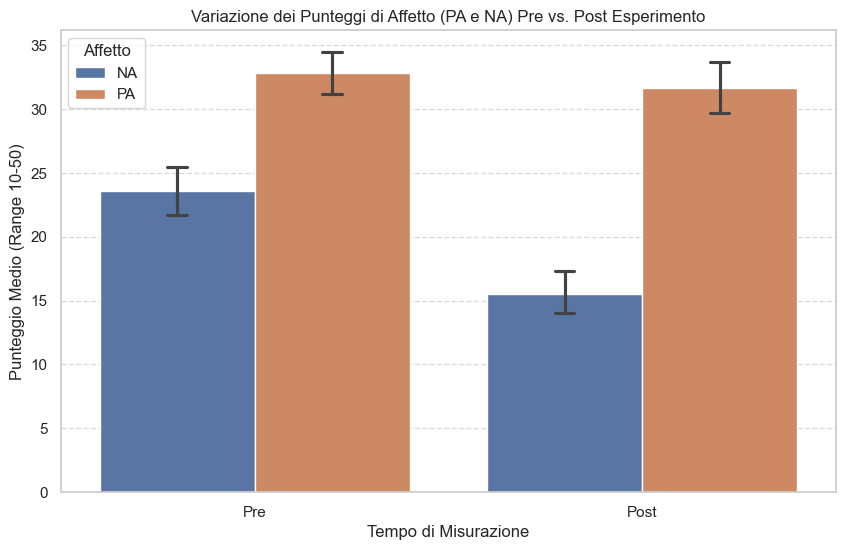

In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. PREPARAZIONE DEI DATI (Da Wide a Long Format) ---

# Creazione di un DataFrame 'long' solo con i punteggi di interesse
data_for_plot = merged_df[['PA_Pre', 'PA_Post', 'NA_Pre', 'NA_Post']]

# Rinomina per il melt
data_for_plot.columns = pd.MultiIndex.from_tuples([
    ('PA', 'Pre'), ('PA', 'Post'), ('NA', 'Pre'), ('NA', 'Post')
])
data_for_plot = data_for_plot.stack(level=0).reset_index(names=['ID', 'Affect'])

# Melt finale per combinare Pre e Post in un'unica colonna
data_long = data_for_plot.melt(
    id_vars=['ID', 'Affect'],
    value_vars=['Pre', 'Post'],
    var_name='Time',
    value_name='Score'
)

# --- 2. CREAZIONE DEL GRAFICO (Bar Plot con Intervallo di Confidenza) ---

plt.figure(figsize=(10, 6))

# Creazione del Bar Plot: 'Time' sull'asse X, 'Score' sull'asse Y, separati per 'Affect'
sns.barplot(
    x='Time',
    y='Score',
    hue='Affect',
    data=data_long,
    errorbar='ci',  # Visualizza l'Intervallo di Confidenza al 95%
    capsize=0.1     # Dimensione dei tappi sulle barre di errore
)

plt.title('Variazione dei Punteggi di Affetto (PA e NA) Pre vs. Post Esperimento')
plt.xlabel('Tempo di Misurazione')
plt.ylabel('Punteggio Medio (Range 10-50)')
plt.legend(title='Affetto')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 3. PROSSIMO PASSO: Test Statistico ---

# Dopo la visualizzazione, il passo cruciale è eseguire un Test t per Campioni Accoppiati
# (Paired Samples t-test) per confermare se le differenze visualizzate sono significative.

<Figure size 1200x600 with 0 Axes>

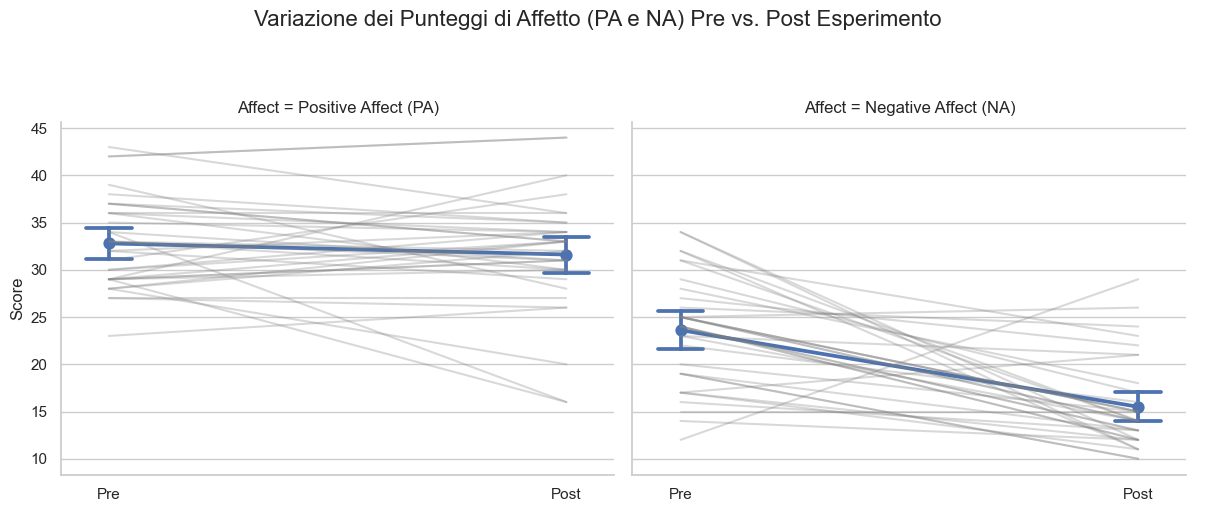

In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# --- 1. PREPARAZIONE DEI DATI (Da Wide a Long Format per il Plot) ---

# Prende solo le colonne dei punteggi calcolati
data_for_plot = merged_df[['PA_Pre', 'PA_Post', 'NA_Pre', 'NA_Post']].copy()

# Aggiunge un ID univoco per ogni partecipante, necessario per tracciare le linee
data_for_plot['ID'] = data_for_plot.index 

# Rinomina e impila i dati per l'Affetto Positivo (PA)
pa_long = data_for_plot[['ID', 'PA_Pre', 'PA_Post']].melt(
    id_vars='ID', 
    var_name='Time', 
    value_name='Score'
)
pa_long['Affect'] = 'Positive Affect (PA)'
pa_long['Time'] = pa_long['Time'].replace({'PA_Pre': 'Pre', 'PA_Post': 'Post'})

# Rinomina e impila i dati per l'Affetto Negativo (NA)
na_long = data_for_plot[['ID', 'NA_Pre', 'NA_Post']].melt(
    id_vars='ID', 
    var_name='Time', 
    value_name='Score'
)
na_long['Affect'] = 'Negative Affect (NA)'
na_long['Time'] = na_long['Time'].replace({'NA_Pre': 'Pre', 'NA_Post': 'Post'})

# Combina i due set di dati in un unico DataFrame 'long'
data_combined = pd.concat([pa_long, na_long])

# --- 2. CREAZIONE DEL PLOT ---

plt.figure(figsize=(12, 6))

# Dividi il grafico in due subplot: uno per PA e uno per NA
sns.catplot(
    data=data_combined,
    x='Time',
    y='Score',
    col='Affect',
    kind='point',  # Usa 'point' per mostrare la media e la barra di errore
    errorbar=('ci', 95), # Barra di errore come Intervallo di Confidenza al 95%
    capsize=0.1,
    height=5,
    aspect=1.2
)

# Aggiungi le linee individuali per mostrare la variazione accoppiata
for i, affect in enumerate(['Positive Affect (PA)', 'Negative Affect (NA)']):
    ax = plt.gcf().axes[i]
    # Filtra i dati per l'Affetto corrente
    subset = data_combined[data_combined['Affect'] == affect]
    
    # Disegna una linea per ogni ID (individuo)
    sns.lineplot(
        data=subset,
        x='Time',
        y='Score',
        units='ID',
        estimator=None, # Non calcolare la media, traccia linee individuali
        alpha=0.3,      # Rendi le linee individuali semi-trasparenti
        color='gray',
        ax=ax,
        legend=False
    )
    # Rimuovi l'etichetta dell'asse x del plot individuale per non sovrapporla
    ax.set_xlabel('') 

plt.suptitle('Variazione dei Punteggi di Affetto (PA e NA) Pre vs. Post Esperimento', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

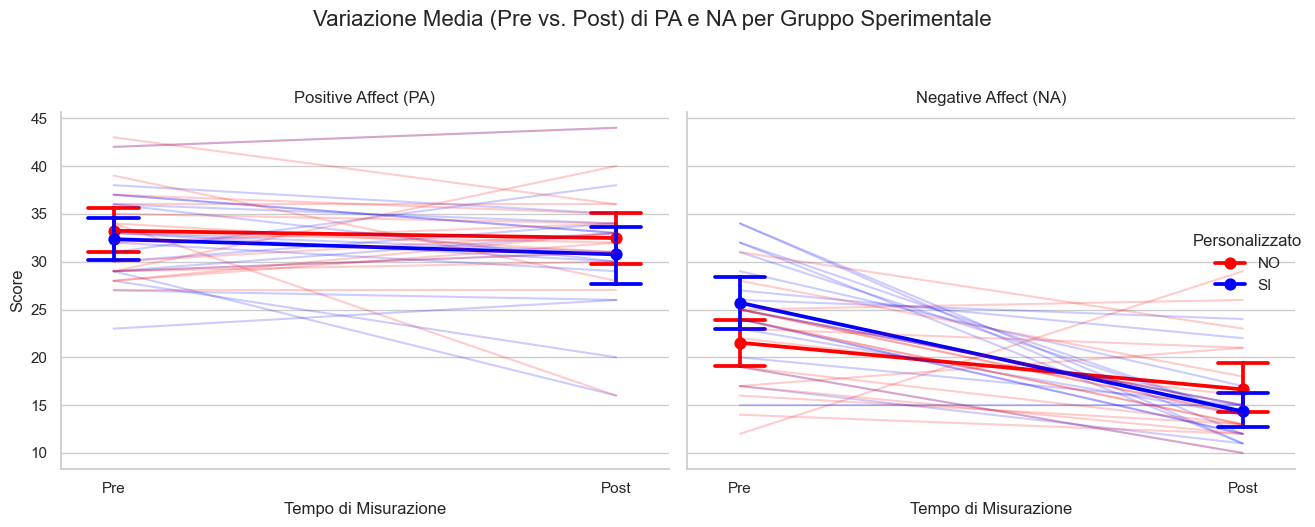

In [227]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# --- 1. PREPARAZIONE DEI DATI (Da Wide a Long Format per il Plot) ---

# Prende le colonne dei punteggi calcolati E la colonna 'Personalizzato'
data_for_plot = merged_df[['PA_Pre', 'PA_Post', 'NA_Pre', 'NA_Post', 'Personalizzato']].copy()

# Aggiunge un ID univoco per ogni partecipante
data_for_plot['ID'] = data_for_plot.index 

# Rinomina e impila i dati per l'Affetto Positivo (PA)
pa_long = data_for_plot[['ID', 'Personalizzato', 'PA_Pre', 'PA_Post']].melt(
    id_vars=['ID', 'Personalizzato'], 
    var_name='Time', 
    value_name='Score'
)
pa_long['Affect'] = 'Positive Affect (PA)'
pa_long['Time'] = pa_long['Time'].replace({'PA_Pre': 'Pre', 'PA_Post': 'Post'})

# Rinomina e impila i dati per l'Affetto Negativo (NA)
na_long = data_for_plot[['ID', 'Personalizzato', 'NA_Pre', 'NA_Post']].melt(
    id_vars=['ID', 'Personalizzato'], 
    var_name='Time', 
    value_name='Score'
)
na_long['Affect'] = 'Negative Affect (NA)'
na_long['Time'] = na_long['Time'].replace({'NA_Pre': 'Pre', 'NA_Post': 'Post'})

# Combina i due set di dati in un unico DataFrame 'long'
data_combined = pd.concat([pa_long, na_long])

# --- 2. CREAZIONE DEI 4 SUBPLOTS ---

# Usa sns.catplot con 'col' per PA/NA e 'hue' per SI/NO.
# 'row' può essere usato al posto di 'col' se preferisci una disposizione diversa.
g = sns.catplot(
    data=data_combined,
    x='Time',
    y='Score',
    col='Affect',        # Colonna 1: divide PA e NA (2 colonne)
    hue='Personalizzato', # Colonna 2: divide SI e NO con il colore (2 colori)
    kind='point', 
    errorbar=('ci', 95), # Intervallo di Confidenza al 95%
    capsize=0.1,
    height=5,
    aspect=1.2,
    palette={'SI': 'blue', 'NO': 'red'} # Colori per distinguere i gruppi
)

# --- 3. AGGIUNTA DELLE LINEE INDIVIDUALI (Per la visualizzazione accoppiata) ---

# Itera su ciascun subplot e aggiungi le linee individuali separate per gruppo e affetto
for affect, ax in g.axes_dict.items():
    # Per ogni subplot (PA e NA), aggiungi le linee individuali
    
    # Linee per il gruppo 'SI'
    subset_si = data_combined[(data_combined['Affect'] == affect) & (data_combined['Personalizzato'] == 'SI')]
    sns.lineplot(
        data=subset_si,
        x='Time',
        y='Score',
        units='ID',
        estimator=None,
        alpha=0.2,
        color='blue', # Lo stesso colore del punto per coerenza
        ax=ax,
        legend=False
    )
    
    # Linee per il gruppo 'NO'
    subset_no = data_combined[(data_combined['Affect'] == affect) & (data_combined['Personalizzato'] == 'NO')]
    sns.lineplot(
        data=subset_no,
        x='Time',
        y='Score',
        units='ID',
        estimator=None,
        alpha=0.2,
        color='red', # Lo stesso colore del punto per coerenza
        ax=ax,
        legend=False
    )
    
    ax.set_xlabel('Tempo di Misurazione')
    ax.set_title(affect)

g.fig.suptitle('Variazione Media (Pre vs. Post) di PA e NA per Gruppo Sperimentale', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

In [228]:
# --- 3. TEST T PER CAMPIONI ACCOPPIATI (Paired Samples t-test) ---

print("\n--- Risultati del Test t per Campioni Accoppiati ---")

# a) Test t per Affetto Positivo (PA)
t_pa, p_pa = stats.ttest_rel(merged_df['PA_Pre'], merged_df['PA_Post'])

# b) Test t per Affetto Negativo (NA)
t_na, p_na = stats.ttest_rel(merged_df['NA_Pre'], merged_df['NA_Post'])

print("\nAffetto Positivo (PA):")
print(f"  Media PA_Pre: {merged_df['PA_Pre'].mean():.2f}")
print(f"  Media PA_Post: {merged_df['PA_Post'].mean():.2f}")
print(f"  T-statistic (t): {t_pa:.3f}")
print(f"  Valore p (p-value): {p_pa:.3f}")

print("\nAffetto Negativo (NA):")
print(f"  Media NA_Pre: {merged_df['NA_Pre'].mean():.2f}")
print(f"  Media NA_Post: {merged_df['NA_Post'].mean():.2f}")
print(f"  T-statistic (t): {t_na:.5f}")
print(f"  Valore p (p-value): {p_na:.6f}")


--- Risultati del Test t per Campioni Accoppiati ---

Affetto Positivo (PA):
  Media PA_Pre: 32.79
  Media PA_Post: 31.62
  T-statistic (t): 1.199
  Valore p (p-value): 0.239

Affetto Negativo (NA):
  Media NA_Pre: 23.62
  Media NA_Post: 15.50
  T-statistic (t): 6.14258
  Valore p (p-value): 0.000001


In [229]:
import pandas as pd

# Assumendo che il tuo DataFrame si chiami 'merged_df' e contenga 'NA_Pre' e 'NA_Post'

# Calcola il punteggio di differenza (Variazione)
merged_df['NA_Difference'] = merged_df['NA_Post'] - merged_df['NA_Pre']

print("Prime 5 righe del DataFrame con la variazione NA:")
print(merged_df[['NA_Pre', 'NA_Post', 'NA_Difference']])

Prime 5 righe del DataFrame con la variazione NA:
    NA_Pre  NA_Post  NA_Difference
0       14       12             -2
1       22       16             -6
2       31       23             -8
3       19       13             -6
4       17       12             -5
5       25       15            -10
6       25       14            -11
7       25       26              1
8       23       21             -2
9       25       14            -11
10      25       15            -10
11      32       11            -21
12      34       12            -22
13      34       11            -23
14      29       17            -12
15      19       10             -9
16      31       14            -17
17      26       24             -2
18      17       11             -6
19      24       12            -12
20      27       22             -5
21      25       15            -10
22      24       12            -12
23      15       15              0
24      12       29             17
25      17       21              4
26   

In [230]:
# Ordina il DataFrame in base alla colonna 'NA_Difference' in ordine decrescente
# (i valori positivi più grandi, che indicano il maggior aumento, saranno in cima)
merged_df_sorted = merged_df.sort_values(by='NA_Difference', ascending=False)

# Prende il partecipante che ha avuto l'aumento più significativo
outlier_increase = merged_df_sorted.iloc[0]

id_outlier = outlier_increase.name

# --- Risultato ---
print("\n--- Partecipante con il Maggiore Aumento di Affetto Negativo (NA) ---")
print(f"ID Partecipante (Indice del DataFrame): {outlier_increase.name}")
print(f"NA Pre-Esperimento: {outlier_increase['NA_Pre']}")
print(f"NA Post-Esperimento: {outlier_increase['NA_Post']}")
print(f"Variazione Totale (Post - Pre): {outlier_increase['NA_Difference']}")

# Se l'indice non è significativo, puoi provare a trovare una colonna 'ID_Partecipante'
# che identifichi meglio il soggetto se presente nel tuo merged_df:
# print(f"ID Partecipante (colonna specifica): {outlier_increase['ID_Partecipante']}")


--- Partecipante con il Maggiore Aumento di Affetto Negativo (NA) ---
ID Partecipante (Indice del DataFrame): 24
NA Pre-Esperimento: 12
NA Post-Esperimento: 29
Variazione Totale (Post - Pre): 17


In [231]:
merged_df.iloc[id_outlier]["Q36"] # A LOLLOOOOOOOOOOO 

'225'

In [232]:
len(merged_df)

34

In [233]:
import pandas as pd
from scipy import stats

# Assumendo che il tuo DataFrame si chiami 'merged_df'

# Calcola le colonne di Variazione (Delta) se non sono già presenti
# Un valore positivo significa aumento, un valore negativo significa diminuzione
if 'PA_Difference' not in merged_df.columns:
    merged_df['PA_Difference'] = merged_df['PA_Post'] - merged_df['PA_Pre']

if 'NA_Difference' not in merged_df.columns:
    merged_df['NA_Difference'] = merged_df['NA_Post'] - merged_df['NA_Pre']

# Suddividi i dati in base al gruppo "Personalizzato"
gruppo_si = merged_df[merged_df['Personalizzato'] == 'SI']
gruppo_no = merged_df[merged_df['Personalizzato'] == 'NO']

print(f"Dimensione Gruppo 'SI': {len(gruppo_si)} | Dimensione Gruppo 'NO': {len(gruppo_no)}")

Dimensione Gruppo 'SI': 17 | Dimensione Gruppo 'NO': 17


In [234]:
t_pa_diff, p_pa_diff = stats.ttest_ind(gruppo_si['PA_Difference'], gruppo_no['PA_Difference'], equal_var=True)

print("\n--- Confronto Variazione Affetto Positivo (Delta PA) ---")
print(f"Media Delta PA ('SI' Personalizzato): {gruppo_si['PA_Difference'].mean():.2f}")
print(f"Media Delta PA ('NO' Controllo): {gruppo_no['PA_Difference'].mean():.2f}")
print(f"T-statistic (t): {t_pa_diff:.3f}")
print(f"Valore p (p-value): {p_pa_diff:.3f}")


--- Confronto Variazione Affetto Positivo (Delta PA) ---
Media Delta PA ('SI' Personalizzato): -1.59
Media Delta PA ('NO' Controllo): -0.76
T-statistic (t): -0.414
Valore p (p-value): 0.681


In [235]:
t_na_diff, p_na_diff = stats.ttest_ind(gruppo_si['NA_Difference'], gruppo_no['NA_Difference'], equal_var=True)

mean_diff_SI = gruppo_si['NA_Difference'].mean()
mean_diff_NO = gruppo_no['NA_Difference'].mean()

print("\n--- Confronto Variazione Affetto Negativo (Delta NA) ---")
print(f"Media Delta NA ('SI' Personalizzato): {gruppo_si['NA_Difference'].mean():.2f}")
print(f"Media Delta NA ('NO' Controllo): {gruppo_no['NA_Difference'].mean():.2f}")
print(f"T-statistic (t): {t_na_diff:.3f}")
print(f"Valore p (p-value): {p_na_diff:.3f}")


--- Confronto Variazione Affetto Negativo (Delta NA) ---
Media Delta NA ('SI' Personalizzato): -11.35
Media Delta NA ('NO' Controllo): -4.88
T-statistic (t): -2.665
Valore p (p-value): 0.012


In [236]:
import numpy as np
import pandas as pd
from scipy import stats

# --- 1. DATI DEI GRUPPI (Basati sui tuoi risultati e N=23) ---

# Assunzione sulla dimensione dei sottogruppi (da confermare con i tuoi dati reali)
N_SI = len(merged_df[merged_df['Personalizzato'] == 'SI'])
N_NO = len(merged_df[merged_df['Personalizzato'] == 'NO'])

# --- 2. CALCOLO DELLA D DI COHEN (Formule basate su t-stat) ---

# Calcola la d di Cohen: misura l'Effect Size
# Formula: d = t * sqrt((N1 + N2) / (N1 * N2))
d_cohen = t_na_diff * np.sqrt((N_SI + N_NO) / (N_SI * N_NO))

# --- 3. RISULTATI ---

print("--- Analisi dell'Effect Size (Influenza della Personalizzazione) ---")
print(f"Dimensione Gruppo SI (Personalizzato): N={N_SI}")
print(f"Dimensione Gruppo NO (Controllo): N={N_NO}")
print("-" * 50)
print(f"La Media della Variazione (riduzione) di NA per SI è stata di: {mean_diff_SI:.2f}")
print(f"La Media della Variazione (riduzione) di NA per NO è stata di: {mean_diff_NO:.2f}")
print(f"La differenza tra i due gruppi è di: {mean_diff_SI - mean_diff_NO:.2f} punti.")
print("-" * 50)
print(f"d di Cohen (Effect Size): {d_cohen:.3f}")

# Interpretazione dell'Effect Size (Standard)
if abs(d_cohen) >= 0.8:
    interpretazione = "MOLTO GRANDE (Strong)"
elif abs(d_cohen) >= 0.5:
    interpretazione = "Medio (Moderate)"
elif abs(d_cohen) >= 0.2:
    interpretazione = "Piccolo (Small)"
else:
    interpretazione = "Trascurabile (Negligible)"

print(f"Interpretazione dell'Effect Size: {interpretazione}")

--- Analisi dell'Effect Size (Influenza della Personalizzazione) ---
Dimensione Gruppo SI (Personalizzato): N=17
Dimensione Gruppo NO (Controllo): N=17
--------------------------------------------------
La Media della Variazione (riduzione) di NA per SI è stata di: -11.35
La Media della Variazione (riduzione) di NA per NO è stata di: -4.88
La differenza tra i due gruppi è di: -6.47 punti.
--------------------------------------------------
d di Cohen (Effect Size): -0.914
Interpretazione dell'Effect Size: MOLTO GRANDE (Strong)


In [237]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf

# Assumiamo che il tuo DataFrame sia 'merged_df' e contenga le colonne necessarie
# (Q34_1, Q34_2, Q34_3, NA_Difference, Personalizzato)

# --- 1. MAPPATURA E CALCOLO DEL PUNTEGGIO DI SOLITUDINE ---

# Mappa le risposte testuali ai valori numerici (scala 1-4)
# (Assumiamo che l'ordine sia 'Mai', 'Raramente', 'Talvolta', 'Spesso')
likert_mapping = {
    'Never': 1,
    'Once in a while': 2,
    'Fairly often': 3,
    'Very often': 4
}

# Applica la mappatura alle colonne della solitudine. 
# NOTA: Assicurati che le stringhe qui sopra corrispondano ESATTAMENTE ai valori nel tuo DataFrame.
for col in ["Q34_1", "Q34_2", "Q34_3"]:
    merged_df[col + '_Numeric'] = merged_df[col].map(likert_mapping)
    
# Calcola il punteggio totale di solitudine pre-intervento (range 3-12)
merged_df['Loneliness_Pre'] = merged_df['Q34_1_Numeric'] + merged_df['Q34_2_Numeric'] + merged_df['Q34_3_Numeric']

print(f"Punteggio medio di Solitudine Pre: {merged_df['Loneliness_Pre'].mean():.2f}")
print("-" * 70)


# --- 2. ANALISI DI CORRELAZIONE TRA SOLITUDINE (PRE) E DELTA NA ---

print("\n--- Analisi di Correlazione Solitudine (Pre) vs. Delta NA (Post - Pre) ---")

# a) Correlazione per l'intero campione
r_total, p_total = stats.pearsonr(merged_df['Loneliness_Pre'], merged_df['NA_Difference'])
print(f"Totale Campione: r = {r_total:.3f}, p = {p_total:.3f}")

# b) Correlazione divisa per gruppo
df_si = merged_df[merged_df['Personalizzato'] == 'SI']
df_no = merged_df[merged_df['Personalizzato'] == 'NO']

r_si, p_si = stats.pearsonr(df_si['Loneliness_Pre'], df_si['NA_Difference'])
print(f"Gruppo 'SI' (Personalizzato): r = {r_si:.3f}, p = {p_si:.3f}")

r_no, p_no = stats.pearsonr(df_no['Loneliness_Pre'], df_no['NA_Difference'])
print(f"Gruppo 'NO' (Controllo): r = {r_no:.3f}, p = {p_no:.3f}")

print("-" * 70)

# --- 3. ANALISI DI MODERAZIONE (REGRESSIONE CON INTERAZIONE) ---

# Questa è la prova più robusta dell'ipotesi di moderazione.

# 3.1 Codifica della variabile Personalizzato: SI=1, NO=0 (Variabile Moderatrice)
merged_df['Personalized_Code'] = np.where(merged_df['Personalizzato'] == 'SI', 1, 0)

# 3.2 Esecuzione del Modello di Regressione
# Variazione NA (Dipendente) ~ Solitudine (Predittore) * Personalizzato (Moderatore)
formula = 'NA_Difference ~ Loneliness_Pre * Personalized_Code'

model = smf.ols(formula=formula, data=merged_df).fit()

print("\n--- Risultati Analisi di Moderazione (Regressione OLS) ---")
print(model.summary().tables[1])

# --- 4. INTERPRETAZIONE (Focus sul termine di interazione) ---
print("-" * 70)
print("Interpretazione: Il termine di interazione (Loneliness_Pre:Personalized_Code) è la chiave.")
print("Se il suo valore p è < 0.05, la Solitudine MODERA l'effetto della Personalizzazione.")

Punteggio medio di Solitudine Pre: 5.65
----------------------------------------------------------------------

--- Analisi di Correlazione Solitudine (Pre) vs. Delta NA (Post - Pre) ---
Totale Campione: r = -0.012, p = 0.945
Gruppo 'SI' (Personalizzato): r = -0.245, p = 0.343
Gruppo 'NO' (Controllo): r = 0.199, p = 0.443
----------------------------------------------------------------------

--- Risultati Analisi di Moderazione (Regressione OLS) ---
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          -10.5000      7.129     -1.473      0.151     -25.059       4.059
Loneliness_Pre                       0.9948      1.225      0.812      0.423      -1.506       3.496
Personalized_Code                    5.8985     10.229      0.577      0.568     -14.992      26.789
Loneliness_Pre:Personalized_Code    -2.1

In [238]:
import pandas as pd
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf

# --- 0. PREPARAZIONE: NOMI E MAPPATURA ---

# Elenco delle 10 colonne in base al tuo schema di denominazione
commensality_cols = [f'meandcomm_{i}' for i in range(1, 11)]

# Colonne con formulazione NEGATIVA che necessitano di essere invertite (Reverse Scoring):
# Un punteggio alto (es. 5=Totally Agree) in questi item indica una BASSA preferenza per la commensalità.
# Basato sull'immagine:
negative_items = [
    'meandcomm_1', # I enjoy eating alone
    'meandcomm_2', # I enjoy eating in silence
    'meandcomm_4', # I often feel a strain while eating meals with others
    'meandcomm_5', # When given the choice, I prefer to eat a meal alone
    'meandcomm_7', # When eating I tend not to interact with other people around me
    'meandcomm_9'  # Eating or drinking with others makes me uncomfortable
]

# Mappatura Likert (da 1 a 5)
likert_mapping = {
    'Totally Disagree': 1,
    'Somewhat Disagree': 2,
    'Neither Agree not Disagree': 3,
    'Somewhat Agree': 4,
    'Totally Agree': 5
}

# --- 1. CALCOLO PUNTEGGIO COMPOSITO (COMMENSALITY_PRE) ---

# 1.1 Applica la mappatura a tutte le colonne
for col in commensality_cols:
    merged_df[col + '_Num'] = merged_df[col].map(likert_mapping)
    
# 1.2 Gestione dei dati mancanti: Rimuovi le righe con NA in queste colonne per un calcolo pulito
merged_df.dropna(subset=[col + '_Num' for col in commensality_cols], inplace=True)

# 1.3 Reverse Scoring (Inversione)
# La formula (5 + 1) - Original Score = 6 - Original Score
for col in negative_items:
    merged_df[col + '_Final'] = 6 - merged_df[col + '_Num']

# 1.4 Copia i valori finali per gli item che NON sono stati invertiti (Positive items)
positive_items = [c for c in commensality_cols if c not in negative_items]
for col in positive_items:
    merged_df[col + '_Final'] = merged_df[col + '_Num']

# 1.5 Calcola il punteggio totale (Range 10-50)
final_cols = [col + '_Final' for col in commensality_cols]
merged_df['Commensality_Pre'] = merged_df[final_cols].sum(axis=1)

print(f"Punteggio medio di Commensalità Pre: {merged_df['Commensality_Pre'].mean():.2f} (Range teorico 10-50)")
print("-" * 80)


# --- 2. ANALISI DI CORRELAZIONE ---

print("\n--- Correlazione Commensalità (Pre) vs. Delta NA (Post - Pre) ---")

# a) Correlazione per il gruppo Personalizzato (SI)
df_si = merged_df[merged_df['Personalizzato'] == 'SI']
r_si, p_si = stats.pearsonr(df_si['Commensality_Pre'], df_si['NA_Difference'])
print(f"Gruppo 'SI' (Personalizzato): r = {r_si:.3f}, p = {p_si:.3f}")

# b) Correlazione per il gruppo Controllo (NO)
df_no = merged_df[merged_df['Personalizzato'] == 'NO']
r_no, p_no = stats.pearsonr(df_no['Commensality_Pre'], df_no['NA_Difference'])
print(f"Gruppo 'NO' (Controllo): r = {r_no:.3f}, p = {p_no:.3f}")

print("-" * 80)


# --- 3. ANALISI DI MODERAZIONE (REGRESSIONE CON INTERAZIONE) ---

# Questa analisi testa se l'impatto della Commensalità è diverso tra i due gruppi.

# Codifica della variabile 'Personalizzato': SI=1, NO=0
merged_df['Personalized_Code'] = np.where(merged_df['Personalizzato'] == 'SI', 1, 0)

# Formula: Delta_NA ~ Commensality_Pre * Personalized_Code
formula = 'NA_Difference ~ Commensality_Pre * Personalized_Code'

model = smf.ols(formula=formula, data=merged_df).fit()

print("\n--- Risultati Analisi di Moderazione (Commensalità) ---")
print(model.summary().tables[1])

print("-" * 80)
print("INTERPRETAZIONE CHIAVE: L'efficacia della moderazione dipende dal p-value del termine di interazione (Commensality_Pre:Personalized_Code). Se p < 0.05, l'ipotesi è supportata.")

Punteggio medio di Commensalità Pre: 37.47 (Range teorico 10-50)
--------------------------------------------------------------------------------

--- Correlazione Commensalità (Pre) vs. Delta NA (Post - Pre) ---
Gruppo 'SI' (Personalizzato): r = 0.107, p = 0.683
Gruppo 'NO' (Controllo): r = -0.051, p = 0.847
--------------------------------------------------------------------------------

--- Risultati Analisi di Moderazione (Commensalità) ---
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -2.8940     10.019     -0.289      0.775     -23.356      17.568
Commensality_Pre                      -0.0535      0.265     -0.202      0.842      -0.595       0.488
Personalized_Code                    -12.6328     14.491     -0.872      0.390     -42.228      16.962
Commensality_Pre:Personalized_Code  

In [240]:
import pandas as pd
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf

# --- 0. PREPARAZIONE: NOMI E MAPPATURA ---

# Elenco delle 4 colonne in base al tuo schema di denominazione
tech_cols = [f'useoftech_{i}' for i in range(1, 5)] 

# useoftech_1: Do you think that using devices... is an acceptable practice? (ITEM POSITIVO)
# Gli altri item (2, 3, 4) sono negativi (misurano direttamente disagio/stress/interazione alterata)

# ITEM POSITIVO da INVERTIRE (useoftech_1)
positive_item = 'useoftech_1' 
negative_items = ['useoftech_2', 'useoftech_3', 'useoftech_4']

# Mappatura Likert (da 1 a 5)
likert_mapping = {
    'Totally Disagree': 1,
    'Somewhat Disagree': 2,
    'Neither Agree nor Disagree': 3,
    'Somewhat Agree': 4,
    'Totally Agree': 5
}

# --- 1. CALCOLO PUNTEGGIO COMPOSITO (TechDiscomfort_Pre) ---

# 1.1 Applica la mappatura a tutte le colonne
for col in tech_cols:
    merged_df[col + '_Num'] = merged_df[col].map(likert_mapping)
    
# 1.2 Gestione dei dati mancanti: Rimuovi le righe con NA in queste colonne per un calcolo pulito
merged_df.dropna(subset=[col + '_Num' for col in tech_cols], inplace=True)

# 1.3 Reverse Scoring per l'item useoftech_1 (accettabilità)
# Un punteggio alto in questo item indica 'basso disagio'. Per allinearlo con 'alto disagio', lo invertiamo.
# Formula: Reverse Score = 6 - Original Score
merged_df[positive_item + '_Final'] = 6 - merged_df[positive_item + '_Num']

# 1.4 Copia i valori finali per gli item NEGATIVI (non invertire)
for col in negative_items:
    merged_df[col + '_Final'] = merged_df[col + '_Num']

# 1.5 Calcola il punteggio totale (Range 4-20)
final_cols = [col + '_Final' for col in tech_cols]
merged_df['TechDiscomfort_Pre'] = merged_df[final_cols].sum(axis=1)

print(f"Punteggio medio di Tecno-Disagio Pre: {merged_df['TechDiscomfort_Pre'].mean():.2f} (Range teorico 4-20)")
print("-" * 80)


# --- 2. ANALISI DI MODERAZIONE (REGRESSIONE OLS) ---

# Codifica la variabile 'Personalizzato': SI=1, NO=0 (se non l'hai già fatto)
merged_df['Personalized_Code'] = np.where(merged_df['Personalizzato'] == 'SI', 1, 0)

# Formula: Delta_NA ~ TechDiscomfort_Pre * Personalized_Code
formula = 'NA_Difference ~ TechDiscomfort_Pre * Personalized_Code'

model = smf.ols(formula=formula, data=merged_df).fit()

print("\n--- Risultati Analisi di Moderazione (Tecno-Disagio) ---")
print(model.summary().tables[1])

print("-" * 80)
print("INTERPRETAZIONE CHIAVE: L'efficacia della moderazione è data dal p-value del termine di interazione (TechDiscomfort_Pre:Personalized_Code). Se p < 0.05, l'ipotesi è supportata.")

Punteggio medio di Tecno-Disagio Pre: 11.44 (Range teorico 4-20)
--------------------------------------------------------------------------------

--- Risultati Analisi di Moderazione (Tecno-Disagio) ---
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -2.3899      5.622     -0.425      0.674     -13.871       9.091
TechDiscomfort_Pre                      -0.2087      0.447     -0.467      0.644      -1.122       0.704
Personalized_Code                       -5.2570      9.097     -0.578      0.568     -23.836      13.322
TechDiscomfort_Pre:Personalized_Code    -0.1300      0.776     -0.168      0.868      -1.714       1.454
--------------------------------------------------------------------------------
INTERPRETAZIONE CHIAVE: L'efficacia della moderazione è data dal p-value del termine 

In [241]:
len(merged_df)

34

In [242]:
import pandas as pd
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf

# --- 0. PREPARAZIONE: NOMI E MAPPATURA ---

# Elenco delle 5 colonne in base al tuo schema di denominazione
techfreq_cols = [f'useoftech2_{i}' for i in range(1, 6)] 

# Mappatura della Frequenza (Assumiamo che l'ordine sia come nell'immagine d04549)
freq_mapping = {
    'Never': 1,
    '1 time a week': 2,
    '2 to 3 times a week': 3,
    '4 to 5 times a week': 4,
    'Once a day': 5,
    'Multiple times a day': 6
}

# --- 1. CALCOLO PUNTEGGIO COMPOSITO (TechFreq_Pre) ---

# 1.1 Applica la mappatura a tutte le colonne
for col in techfreq_cols:
    merged_df[col + '_Num'] = merged_df[col].map(freq_mapping)
    
# 1.2 Gestione dei dati mancanti: Rimuovi le righe con NA in queste colonne per un calcolo pulito
merged_df.dropna(subset=[col + '_Num' for col in techfreq_cols], inplace=True)

# 1.3 Calcola il punteggio totale (Range 5-30)
final_cols = [col + '_Num' for col in techfreq_cols]
# Non serve il reverse scoring, assumiamo che più frequenza sia semplicemente un valore più alto.
merged_df['TechFreq_Pre'] = merged_df[final_cols].sum(axis=1)

print(f"Punteggio medio di Frequenza d'Uso Tecnologia Pre: {merged_df['TechFreq_Pre'].mean():.2f} (Range teorico 5-30)")
print("-" * 80)


# --- 2. ANALISI DI MODERAZIONE (REGRESSIONE OLS) ---

# Codifica la variabile 'Personalizzato': SI=1, NO=0 (se non l'hai già fatto)
merged_df['Personalized_Code'] = np.where(merged_df['Personalizzato'] == 'SI', 1, 0)

# Formula: Delta_NA ~ TechFreq_Pre * Personalized_Code
formula = 'NA_Difference ~ TechFreq_Pre * Personalized_Code'

model = smf.ols(formula=formula, data=merged_df).fit()

print("\n--- Risultati Analisi di Moderazione (Frequenza d'Uso Tecnologia) ---")
print(model.summary().tables[1])

print("-" * 80)
print("INTERPRETAZIONE CHIAVE: L'efficacia della moderazione è data dal p-value del termine di interazione (TechFreq_Pre:Personalized_Code). Se p < 0.05, l'ipotesi è supportata.")

Punteggio medio di Frequenza d'Uso Tecnologia Pre: 17.50 (Range teorico 5-30)
--------------------------------------------------------------------------------

--- Risultati Analisi di Moderazione (Frequenza d'Uso Tecnologia) ---
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -5.9055      7.721     -0.765      0.450     -21.673       9.862
TechFreq_Pre                       0.0572      0.421      0.136      0.893      -0.802       0.917
Personalized_Code                -17.4718     11.806     -1.480      0.149     -41.582       6.639
TechFreq_Pre:Personalized_Code     0.6452      0.663      0.974      0.338      -0.708       1.999
--------------------------------------------------------------------------------
INTERPRETAZIONE CHIAVE: L'efficacia della moderazione è data dal p-value del termine di interaz

In [243]:
len(merged_df)

34

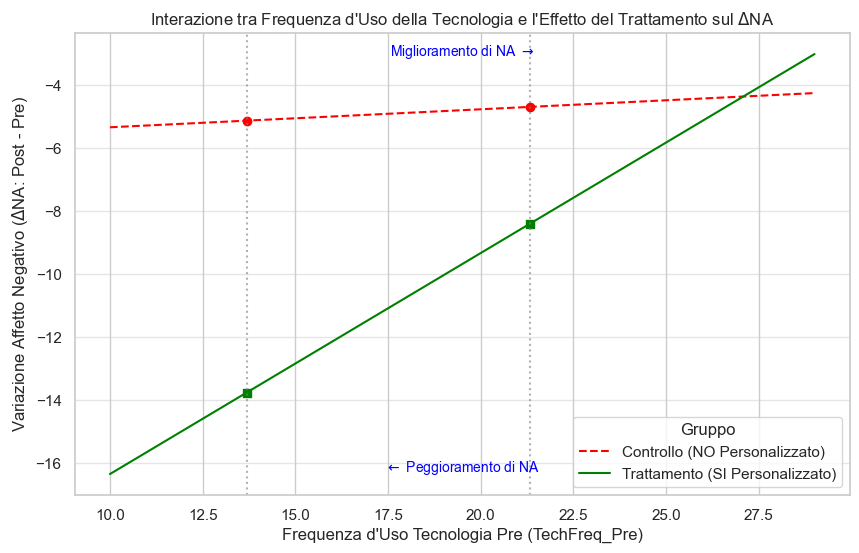

C:\Users\gabri\AppData\Local\Temp\ipykernel_4492\3629653604.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = merged_df.groupby(['Personalizzato', 'Freq_Level'])['NA_Difference'].mean().unstack()


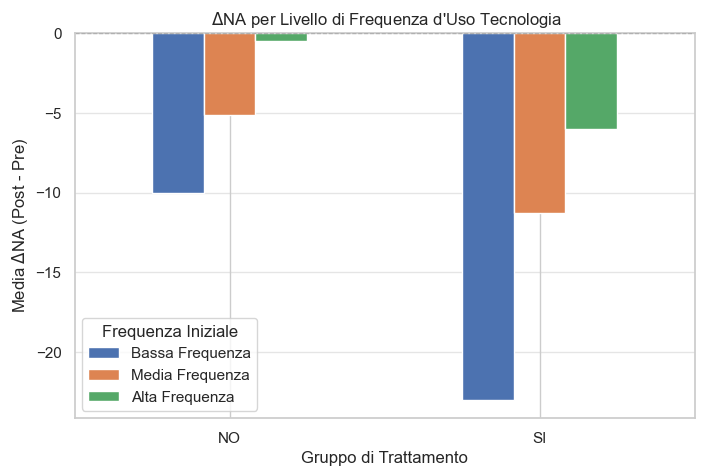

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Assumiamo che il tuo DataFrame 'merged_df' sia già pronto e pulito.
# Assumiamo che il modello 'model' sia quello che hai eseguito per TechFreq_Pre:
# formula = 'NA_Difference ~ TechFreq_Pre * Personalized_Code'
# model = smf.ols(formula=formula, data=merged_df).fit() 

# --- Aggiungi qui il codice di preparazione del modello OLS e il DataFrame! ---
# Per la corretta esecuzione del codice, devi assicurarti che queste righe siano nel tuo script
# se non l'hai già fatto nel contesto della tua sessione:

# 1. Preparazione delle variabili (Esempio, adatta se necessario)
# merged_df['Personalized_Code'] = np.where(merged_df['Personalizzato'] == 'SI', 1, 0)
# techfreq_cols = [f'useoftech2_{i}_Num' for i in range(1, 6)] 
# merged_df['TechFreq_Pre'] = merged_df[techfreq_cols].sum(axis=1)

# 2. Definizione della formula e fit del modello
# formula = 'NA_Difference ~ TechFreq_Pre * Personalized_Code'
# model = smf.ols(formula=formula, data=merged_df).fit() 
# ---------------------------------------------------------------------------------


# --- 1. Calcolo dei Punti per il Grafico di Interazione ---

# Calcola media e deviazione standard per TechFreq_Pre
mean_freq = merged_df['TechFreq_Pre'].mean()
std_freq = merged_df['TechFreq_Pre'].std()

# Definisci i punti Basso (Mean - 1SD) e Alto (Mean + 1SD) e il range per la linea
low_freq = mean_freq - std_freq
high_freq = mean_freq + std_freq
x_range = np.linspace(merged_df['TechFreq_Pre'].min(), merged_df['TechFreq_Pre'].max(), 100)

# Crea un DataFrame fittizio per le previsioni
pred_data = pd.DataFrame({
    'TechFreq_Pre': np.tile(x_range, 2),  # 100 valori per SI e 100 per NO
    'Personalized_Code': np.repeat([0, 1], len(x_range)) # 0 per NO, 1 per SI
})

# Esegui la previsione
pred_data['NA_Difference_Pred'] = model.predict(pred_data)

# Separa i risultati per la linea del grafico
pred_no = pred_data[pred_data['Personalized_Code'] == 0]
pred_si = pred_data[pred_data['Personalized_Code'] == 1]

# Punti Basso/Alto per visualizzare i risultati del test post-hoc
# Questi punti sono utili per interpretare l'effetto:
low_pred_no = model.predict({'TechFreq_Pre': low_freq, 'Personalized_Code': 0})[0]
high_pred_no = model.predict({'TechFreq_Pre': high_freq, 'Personalized_Code': 0})[0]
low_pred_si = model.predict({'TechFreq_Pre': low_freq, 'Personalized_Code': 1})[0]
high_pred_si = model.predict({'TechFreq_Pre': high_freq, 'Personalized_Code': 1})[0]

# --- 2. Grafico di Interazione ---

plt.figure(figsize=(10, 6))

# Linee di regressione previste
plt.plot(pred_no['TechFreq_Pre'], pred_no['NA_Difference_Pred'], 
         label='Controllo (NO Personalizzato)', color='red', linestyle='--')
plt.plot(pred_si['TechFreq_Pre'], pred_si['NA_Difference_Pred'], 
         label='Trattamento (SI Personalizzato)', color='green', linestyle='-')

# Punti per Basso/Alto (solo per riferimento visivo)
plt.scatter([low_freq, high_freq], [low_pred_no, high_pred_no], color='red', marker='o')
plt.scatter([low_freq, high_freq], [low_pred_si, high_pred_si], color='green', marker='s')

# Linee verticali per indicare Media -1DS e Media +1DS
plt.axvline(low_freq, color='gray', linestyle=':', alpha=0.6)
plt.axvline(high_freq, color='gray', linestyle=':', alpha=0.6)

# Etichette e Titoli
plt.title('Interazione tra Frequenza d\'Uso della Tecnologia e l\'Effetto del Trattamento sul $\Delta$NA')
plt.xlabel('Frequenza d\'Uso Tecnologia Pre (TechFreq_Pre)')
plt.ylabel('Variazione Affetto Negativo ($\Delta$NA: Post - Pre)')
plt.legend(title='Gruppo')
plt.grid(axis='y', alpha=0.5)

# Aggiungi una nota chiave per l'interpretazione visiva
# (Ricorda: i valori NA_Difference più bassi (negativi) significano un miglioramento)
plt.text(0.5, 0.95, 
         'Miglioramento di NA $\\rightarrow$', 
         transform=plt.gca().transAxes, 
         fontsize=10, color='blue', 
         horizontalalignment='center')
plt.text(0.5, 0.05, 
         '$\\leftarrow$ Peggioramento di NA', 
         transform=plt.gca().transAxes, 
         fontsize=10, color='blue', 
         horizontalalignment='center')


plt.show()


# --- 3. Grafico a Barre (Visualizzazione Semplificata) ---

# Raggruppamento per Basso e Alto (Media -/+ 1DS)
merged_df['Freq_Level'] = pd.cut(merged_df['TechFreq_Pre'], 
                                 bins=[-np.inf, low_freq, high_freq, np.inf],
                                 labels=['Bassa Frequenza', 'Media Frequenza', 'Alta Frequenza'],
                                 include_lowest=True)

# Calcola la media di Delta NA per ogni combinazione di Gruppo e Livello di Frequenza
bar_data = merged_df.groupby(['Personalizzato', 'Freq_Level'])['NA_Difference'].mean().unstack()

plt.figure(figsize=(8, 5))
bar_data.plot(kind='bar', rot=0, ax=plt.gca())

plt.title(' $\Delta$NA per Livello di Frequenza d\'Uso Tecnologia')
plt.xlabel('Gruppo di Trattamento')
plt.ylabel('Media $\Delta$NA (Post - Pre)')
plt.legend(title='Frequenza Iniziale')
plt.grid(axis='y', alpha=0.5)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') # Linea di non-cambiamento
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_4492\57001614.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean_na = merged_df.groupby(['Personalizzato', 'Freq_Level_Real'])['NA_Difference'].mean().unstack()


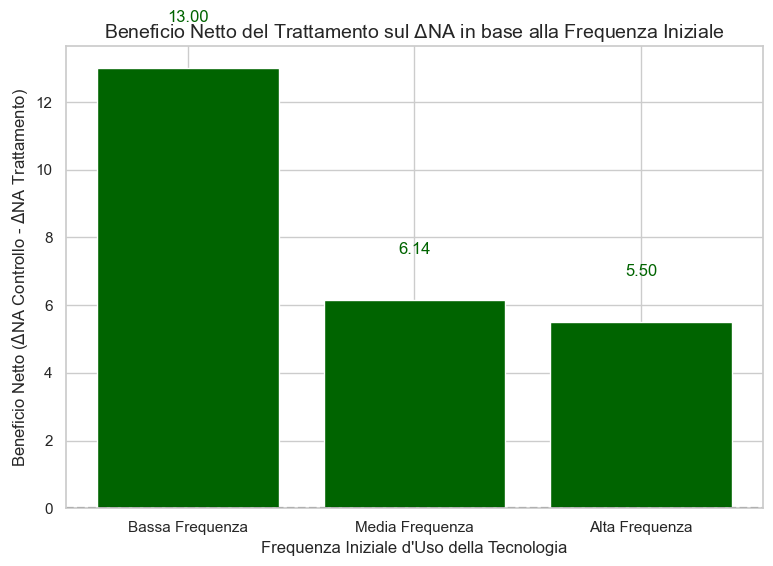

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Uso seaborn per un look più pulito

# --- 1. Ricalcolo delle Variabili di Raggruppamento ---

# Calcola media e deviazione standard della variabile moderatrice (TechFreq_Pre)
mean_freq = merged_df['TechFreq_Pre'].mean()
std_freq = merged_df['TechFreq_Pre'].std()

# Definisce i bin (intervalli) per Bassa (Media - 1DS) e Alta (Media + 1DS)
low_freq = mean_freq - std_freq
high_freq = mean_freq + std_freq

# Crea la variabile categoriale Freq_Level (necessaria per il grafico a barre)
merged_df['Freq_Level_Real'] = pd.cut(merged_df['TechFreq_Pre'], 
                                      bins=[-np.inf, low_freq, high_freq, np.inf],
                                      labels=['Bassa Frequenza', 'Media Frequenza', 'Alta Frequenza'],
                                      include_lowest=True)

# --- 2. Calcolo dei Valori Medi Esatti (df_mean_na) ---

# Calcola le medie esatte di Delta NA raggruppate per Gruppo e Livello di Frequenza
# Questa è la parte cruciale che usa i tuoi dati veri
df_mean_na = merged_df.groupby(['Personalizzato', 'Freq_Level_Real'])['NA_Difference'].mean().unstack()

# Trasponi il DataFrame per avere SI e NO come indici
df_mean_na = df_mean_na.transpose() 


# --- 3. Calcolo del Beneficio Netto Esatto ---

# Beneficio Netto = Media NA_Controllo (NO) - Media NA_Trattamento (SI)
# (Un valore positivo significa che SI è migliore di NO)
net_benefit_real = df_mean_na['NO'] - df_mean_na['SI']

# --- 4. Generazione del Grafico (Beneficio Netto) ---

plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")

# Creazione delle barre con colori basati sul Beneficio
bars = plt.bar(net_benefit_real.index, net_benefit_real.values, 
               color=['darkgreen' if b > 0 else 'firebrick' for b in net_benefit_real.values])

# Aggiunta di una linea orizzontale a zero (No Effetto)
plt.axhline(0, color='black', linewidth=1.5, linestyle='--')

# Etichette dei valori (per chiarezza)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + np.sign(yval) * 1.5, 
             f'{yval:.2f}', ha='center', va='center', fontsize=12, 
             color=('darkgreen' if yval > 0 else 'firebrick'))

# Etichette e Titoli
plt.title('Beneficio Netto del Trattamento sul $\Delta$NA in base alla Frequenza Iniziale', fontsize=14)
plt.xlabel('Frequenza Iniziale d\'Uso della Tecnologia', fontsize=12)
plt.ylabel('Beneficio Netto ($\Delta$NA Controllo - $\Delta$NA Trattamento)', fontsize=12)
plt.xticks(rotation=0)

plt.show()

In [246]:
# 2. Unisci i punteggi OCEAN al merged_df
# Assumo che la colonna ID si chiami 'Q36' in entrambi i DataFrame
merged_df = merged_df.merge(scores, on='Q36', how='left')

print("Punteggi OCEAN uniti al merged_df con successo.")

# ====================================================================================
# === 3. ANALISI DI CORRELAZIONE TRA BIG FIVE (OCEAN) E DELTA NA ===

ocean_traits = [
    'openness', 
    'conscientiousness', 
    'extroversion', 
    'agreeableness', 
    'neuroticism'
]

target_var = 'NA_Difference'

print("\n--- Correlazione Personalità (Pre) vs. Delta NA (Post - Pre) ---")

# Dividi il DataFrame per gruppo
df_si = merged_df[merged_df['Personalizzato'] == 'SI'].copy()
df_no = merged_df[merged_df['Personalizzato'] == 'NO'].copy()

results = {}

for trait in ocean_traits:
    
    # Pulizia dati mancanti (solo per le colonne in analisi)
    df_si_clean = df_si.dropna(subset=[trait, target_var])
    df_no_clean = df_no.dropna(subset=[trait, target_var])
    
    # Correlazione Gruppo SI
    r_si, p_si = stats.pearsonr(df_si_clean[trait], df_si_clean[target_var])
    
    # Correlazione Gruppo NO
    r_no, p_no = stats.pearsonr(df_no_clean[trait], df_no_clean[target_var])
    
    results[trait] = {
        'r_SI': f'{r_si:.3f}', 
        'p_SI': f'{p_si:.3f}',
        'r_NO': f'{r_no:.3f}',
        'p_NO': f'{p_no:.3f}'
    }

# Stampa i risultati
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index.name = "Tratto di Personalità"

print(results_df)

Punteggi OCEAN uniti al merged_df con successo.

--- Correlazione Personalità (Pre) vs. Delta NA (Post - Pre) ---
                         r_SI   p_SI    r_NO   p_NO
Tratto di Personalità                              
openness               -0.418  0.095  -0.262  0.310
conscientiousness      -0.313  0.222   0.117  0.654
extroversion            0.087  0.741   0.119  0.649
agreeableness           0.396  0.116  -0.200  0.442
neuroticism             0.512  0.036  -0.342  0.179


In [247]:
len(merged_df)

34

In [248]:
print(merged_df.columns.tolist())

['StartDate_Pre', 'EndDate_Pre', 'Status_Pre', 'IPAddress_Pre', 'Progress_Pre', 'Duration (in seconds)_Pre', 'Finished_Pre', 'RecordedDate_Pre', 'ResponseId_Pre', 'RecipientLastName_Pre', 'RecipientFirstName_Pre', 'RecipientEmail_Pre', 'ExternalReference_Pre', 'LocationLatitude_Pre', 'LocationLongitude_Pre', 'DistributionChannel_Pre', 'UserLanguage_Pre', 'consentage', 'consent', 'name', 'confirm', 'aware', 'particip', 'name2', 'Q36', 'Q17', 'Q18', 'Q19', 'Q20', 'Q22', 'Q24', 'Q26', 'Q27', 'Q28', 'Q29_1', 'Q29_2', 'Q29_3', 'Q29_4', 'Q29_5', 'Q29_6', 'Q29_7', 'Q29_8', 'Q29_9', 'Q29_10', 'Q29_11', 'Q29_12', 'Q29_13', 'Q29_14', 'Q29_15', 'meandcomm_1', 'meandcomm_2', 'meandcomm_3', 'meandcomm_4', 'meandcomm_5', 'meandcomm_6', 'meandcomm_7', 'meandcomm_8', 'meandcomm_9', 'meandcomm_10', 'freqeat_1', 'freqeat_2', 'freqeat_3', 'freqeat_4', 'useoftech_1', 'useoftech_2', 'useoftech_3', 'useoftech_4', 'useoftech2_1', 'useoftech2_2', 'useoftech2_3', 'useoftech2_4', 'useoftech2_5', 'Q33_1', 'Q33_2

In [252]:
import statsmodels.formula.api as smf
# Assumo che NA_Difference e Personalized_Code siano già presenti e pulite

# Formula: Delta_NA ~ Nevroticismo * Personalized_Code
formula_neuroticism = 'NA_Difference ~ neuroticism * Personalized_Code'

# Creazione di un DataFrame TEMPORANEO e pulito SOLO per questo test
df_clean_n = merged_df.dropna(subset=['neuroticism', 'Personalized_Code', 'NA_Difference']).copy()
N_n = len(df_clean_n)

model_neuroticism = smf.ols(formula=formula_neuroticism, data=df_clean_n).fit()

print(f"\n--- Risultati Moderazione: Nevroticismo (N={N_n}) ---")
print(model_neuroticism.summary().tables[1])


--- Risultati Moderazione: Nevroticismo (N=34) ---
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         6.4634      7.705      0.839      0.408      -9.272      22.199
neuroticism                      -2.5147      1.670     -1.505      0.143      -5.926       0.897
Personalized_Code               -35.2374     11.323     -3.112      0.004     -58.363     -12.112
neuroticism:Personalized_Code     6.3810      2.461      2.593      0.015       1.355      11.407


In [253]:
# Formula: Delta_NA ~ Apertura * Personalized_Code
formula_openness = 'NA_Difference ~ openness * Personalized_Code'

# Creazione di un DataFrame TEMPORANEO e pulito SOLO per questo test
df_clean_o = merged_df.dropna(subset=['openness', 'Personalized_Code', 'NA_Difference']).copy()
N_o = len(df_clean_o)

model_openness = smf.ols(formula=formula_openness, data=df_clean_o).fit()

print(f"\n--- Risultati Moderazione: Apertura (N={N_o}) ---")
print(model_openness.summary().tables[1])


--- Risultati Moderazione: Apertura (N=34) ---
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.6385      6.114      0.268      0.791     -10.848      14.125
openness                      -1.7512      1.580     -1.108      0.276      -4.978       1.475
Personalized_Code              0.4275     10.202      0.042      0.967     -20.408      21.263
openness:Personalized_Code    -1.3609      2.436     -0.559      0.581      -6.336       3.614


In [251]:
try:
    merged_df.to_excel("merged_qualtrics_finale.xlsx", index=False)
except:
    print("\n--- ATTENZIONE: FILE NON SALVATO ---\nExcel aperto, chiuderlo per salvarne una versione nuova!")

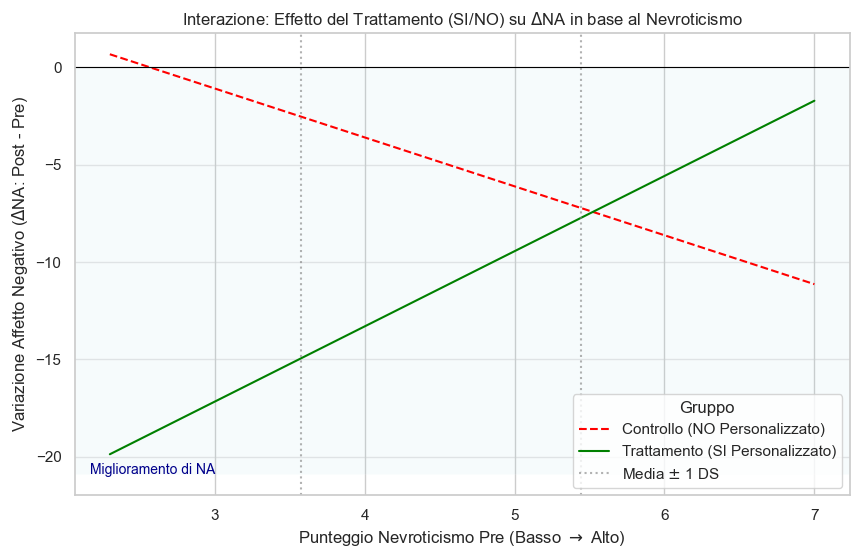

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# --- 1. PREPARAZIONE DEL MODELLO E DEI PUNTI ---

# Assumo che 'merged_df' contenga i dati puliti e che Personalized_Code = 0/1

# 1.1 Esegui il modello di regressione OLS (su un set pulito)
df_clean_n = merged_df.dropna(subset=['neuroticism', 'Personalized_Code', 'NA_Difference']).copy()
formula_n = 'NA_Difference ~ neuroticism * Personalized_Code'
model_neuroticism = smf.ols(formula=formula_n, data=df_clean_n).fit()


# 1.2 Calcola media e deviazione standard per i punti Basso/Alto
mean_n = merged_df['neuroticism'].mean()
std_n = merged_df['neuroticism'].std()
low_n = mean_n - std_n
high_n = mean_n + std_n

# 1.3 Crea un range per l'asse X del grafico
# Usa l'intervallo di nevroticismo osservato nel campione
x_range = np.linspace(merged_df['neuroticism'].min(), merged_df['neuroticism'].max(), 100)

# 1.4 Crea un DataFrame fittizio per le previsioni
pred_data = pd.DataFrame({
    'neuroticism': np.tile(x_range, 2),  # 100 valori per SI e 100 per NO
    'Personalized_Code': np.repeat([0, 1], len(x_range)) # 0 per NO, 1 per SI
})

# 1.5 Esegui la previsione basata sul modello
pred_data['NA_Difference_Pred'] = model_neuroticism.predict(pred_data)

# 1.6 Separa i risultati per le due linee
pred_no = pred_data[pred_data['Personalized_Code'] == 0]
pred_si = pred_data[pred_data['Personalized_Code'] == 1]


# --- 2. GENERAZIONE DEL GRAFICO DI INTERAZIONE ---

plt.figure(figsize=(10, 6))

# Linee di regressione previste
plt.plot(pred_no['neuroticism'], pred_no['NA_Difference_Pred'], 
         label='Controllo (NO Personalizzato)', color='red', linestyle='--')
plt.plot(pred_si['neuroticism'], pred_si['NA_Difference_Pred'], 
         label='Trattamento (SI Personalizzato)', color='green', linestyle='-')

# Linee verticali per indicare Media -1DS e Media +1DS (per riferimento)
plt.axvline(low_n, color='gray', linestyle=':', alpha=0.6, label='Media $\pm$ 1 DS')
plt.axvline(high_n, color='gray', linestyle=':', alpha=0.6)

# Etichette e Titoli
plt.title('Interazione: Effetto del Trattamento (SI/NO) su $\Delta$NA in base al Nevroticismo')
plt.xlabel('Punteggio Nevroticismo Pre (Basso $\\rightarrow$ Alto)')
plt.ylabel('Variazione Affetto Negativo ($\Delta$NA: Post - Pre)')
plt.legend(title='Gruppo')
plt.grid(axis='y', alpha=0.5)

# Zona interpretativa
plt.axhspan(plt.ylim()[0], 0, facecolor='lightblue', alpha=0.1)
plt.text(plt.xlim()[0] + 0.1, plt.ylim()[0] * 0.95, 'Miglioramento di NA', color='darkblue', fontsize=10)
plt.axhline(0, color='black', linewidth=0.8, linestyle='-')

plt.show()

In [255]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

# Assumiamo che TechFreq_Pre, neuroticism, Personalized_Code, e NA_Difference siano disponibili in merged_df

# Variabili
target_var = 'NA_Difference'
mod1 = 'TechFreq_Pre'
mod2 = 'neuroticism'
treatment = 'Personalized_Code'

# Creazione di un DataFrame TEMPORANEO e pulito per il modello
df_clean_3way = merged_df[[target_var, mod1, mod2, treatment]].copy()
df_clean_3way.dropna(inplace=True)

N_3way = len(df_clean_3way)

# Formula di interazione a tre vie (A * B * C espande tutte le interazioni possibili)
formula_3way = f'{target_var} ~ {mod1} * {mod2} * {treatment}'

model_3way = smf.ols(formula=formula_3way, data=df_clean_3way).fit()

print(f"\n--- Risultati Analisi di Moderazione a Tre Vie (N={N_3way}) ---")
print(model_3way.summary().tables[1])

print("\nTermine di Interazione Chiave (Tre Vie): TechFreq_Pre:neuroticism:Personalized_Code")
print("Se P>|t| < 0.05, significa che l'effetto della Freq. Tecnica dipende dal Nevroticismo e viceversa.")


--- Risultati Analisi di Moderazione a Tre Vie (N=34) ---
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     18.1102     49.199      0.368      0.716     -83.019     119.240
TechFreq_Pre                                  -0.6255      2.617     -0.239      0.813      -6.006       4.755
neuroticism                                   -5.0651     11.157     -0.454      0.654     -27.998      17.868
TechFreq_Pre:neuroticism                       0.1379      0.601      0.229      0.820      -1.097       1.373
Personalized_Code                           -121.1185     65.762     -1.842      0.077    -256.294      14.057
TechFreq_Pre:Personalized_Code                 5.1904      3.683      1.409      0.171      -2.380      12.760
neuroticism:Personalized_Code                 22.6929